In [87]:
#Importing packages for data manipulation, visualisation and model building
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import metrics

#Importing packages for evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [88]:
#random seed so that the results are reproducible
np.random.seed(2)
#Uploading the data into X and Y (input and outputs)
# to train the neural network
dataset = pd.read_csv('/Users/user/PycharmProjects/covid_classification/data/covid_final.csv')
X = dataset[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = dataset['result']

In [89]:
#Splitting the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

# Building and training a neural network

In [90]:
#creating a simple feedforward neural network
model = Sequential()
model.add(Dense(15, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2)) #Dropout added to prevent overfitting
model.add(Dense(1, activation='sigmoid'))

In [91]:
#compile the neural network
model.compile(loss='binary_crossentropy', optimizer = "adam", metrics =['accuracy'])

#train and validate the neural network
model.fit(X_train, Y_train, epochs = 100, batch_size = 20, validation_data = (X_test,Y_test))

#saving the neural network
model.save('/Users/user/PycharmProjects/covid_classification/models/neural_net.h5')

Epoch 1/100
31/31 [==============================] - 0s 7ms/step - loss: 0.6048 - accuracy: 0.8593 - val_loss: 0.4275 - val_accuracy: 0.8687
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.3717 - accuracy: 0.8576 - val_loss: 0.3448 - val_accuracy: 0.8571
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.3297 - accuracy: 0.8295 - val_loss: 0.3207 - val_accuracy: 0.8571
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2897 - accuracy: 0.8593 - val_loss: 0.3096 - val_accuracy: 0.8571
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2756 - accuracy: 0.8543 - val_loss: 0.2906 - val_accuracy: 0.8687
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.8758 - val_loss: 0.2867 - val_accuracy: 0.8958
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2442 - accuracy: 0.8858 - val_loss: 0.2666 - val_accuracy: 0.8996
Epoch 8/100
3

Epoch 59/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1052 - accuracy: 0.9636 - val_loss: 0.1461 - val_accuracy: 0.9266
Epoch 60/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1091 - accuracy: 0.9503 - val_loss: 0.1776 - val_accuracy: 0.9344
Epoch 61/100
31/31 [==============================] - 0s 6ms/step - loss: 0.1122 - accuracy: 0.9586 - val_loss: 0.1428 - val_accuracy: 0.9344
Epoch 62/100
31/31 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9470 - val_loss: 0.1545 - val_accuracy: 0.9421
Epoch 63/100
31/31 [==============================] - 0s 4ms/step - loss: 0.1223 - accuracy: 0.9387 - val_loss: 0.1431 - val_accuracy: 0.9421
Epoch 64/100
31/31 [==============================] - 0s 6ms/step - loss: 0.1021 - accuracy: 0.9536 - val_loss: 0.1362 - val_accuracy: 0.9421
Epoch 65/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9520 - val_loss: 0.1430 - val_accuracy: 0.9459
Epoch 

# Evaluating and visualising the performance of the neural network

In [96]:
#Evaluate Neural Net
training_acc_nn = model.evaluate(X_train,Y_train,verbose=0)
test_acc_nn = model.evaluate(X_test,Y_test,verbose=0)
print(training_acc_nn)
print(test_acc_nn)

[0.05537649616599083, 0.9801324605941772]
[0.10274749994277954, 0.953667938709259]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.8055555555555556
0.9536679536679536
0.8285714285714286
0.8529411764705882


Text(0.5, 1.0, 'Evaluation Metrics for Neural Network')

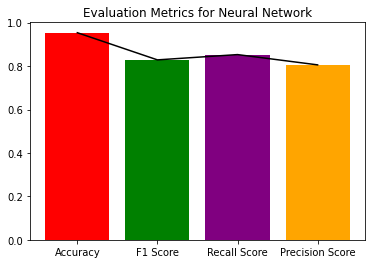

In [98]:
#Visualising metrics to Neural Net
Y_predict_nn = model.predict_classes(X_test,verbose=0)

accuracy_nn = accuracy_score(Y_test,Y_predict_nn)
precision_nn = precision_score(Y_test, Y_predict_nn)
f1_nn = f1_score(Y_test,Y_predict_nn)
recall_nn = recall_score(Y_test, Y_predict_nn)
print(precision_nn)
print(accuracy_nn)
print(f1_nn)
print(recall_nn)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy_nn,f1_nn,recall_nn,precision_nn],color=['red','green','purple','orange'])
plt.plot([accuracy_nn,f1_nn,recall_nn,precision_nn],color='black')
plt.title('Evaluation Metrics for Neural Network')

# Fitting the data on a KNNs 

In [ ]:
#Build and train a KNNs model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

# Evaluating and visualising metrics of KNNs classifier

In [ ]:
# Evaluating and reviewing metrics of the predictions of the KNNs model
Y_predict_knn = knn_model.predict(X_test)
#Comparing the output I expected (Y_test) against the ones the model predicted (Y_predict)
knn_metrics = metrics.classification_report(Y_test,Y_predict_knn)
print(knn_metrics)

In [ ]:
#A glance at predictions of the KNN model vs the expected results
table = pd.DataFrame(Y_test)
print('table 1')
print(table.head())
#add the predictions to the dataframe
table['predictions'] = Y_predict_knn
print('table 2')
print(table.head())

In [ ]:
#Visualising evaluation metrics for KNN

accuracy_knn = accuracy_score(Y_test,Y_predict_knn)
precision_knn = precision_score(Y_test, Y_predict_knn)
f1_knn = f1_score(Y_test,Y_predict_knn)
recall_knn = recall_score(Y_test, Y_predict_knn)
print(precision_knn)
print(accuracy_knn)
print(f1_knn)
print(recall_knn)

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy_knn,f1_knn,recall_knn,precision_knn],color=['red','green','purple','orange'])
plt.plot([accuracy_knn,f1_knn,recall_knn,precision_knn],color='black')
plt.title('Evaluation Metrics for K-Nearest Neighbors')

# Visualising NN vs KNN

In [ ]:
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','Boosted Random Forest'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['purple','red'])
plt.plot(['KNNs','Neural Net'],[f1_knn,f1_nn],color='purple',marker='D')
plt.plot(['KNNs','Neural Net'],[accuracy_knn,accuracy_nn],color='red',marker='^')
plt.plot(['KNNs','Neural Net'],[precision_knn,precision_nn],color='blue',marker='s')
plt.plot(['KNNs','Neural Net'],[recall_knn,recall_nn],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparing the models\' metrics')

plt.show(fig)

In [41]:
#Build and train a KNNs model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

# Evaluating and visualising metrics of KNNs classifier

In [72]:
# Evaluating and reviewing metrics of the predictions of the KNNs model
Y_predict_knn = knn_model.predict(X_test)
#Comparing the output I expected (Y_test) against the ones the model predicted (Y_predict)
knn_metrics = metrics.classification_report(Y_test,Y_predict_knn)
print(knn_metrics)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       225
           1       0.83      0.56      0.67        34

    accuracy                           0.93       259
   macro avg       0.88      0.77      0.81       259
weighted avg       0.92      0.93      0.92       259



In [73]:
#A glance at predictions of the KNN model vs the expected results
table = pd.DataFrame(Y_test)
print('table 1')
print(table.head())
#add the predictions to the dataframe
table['predictions'] = Y_predict_knn
print('table 2')
print(table.head())

table 1
     result
437       0
723       0
781       1
450       0
52        0
table 2
     result  predictions
437       0            0
723       0            0
781       1            0
450       0            0
52        0            0


0.8260869565217391
0.9266409266409267
0.6666666666666667
0.5588235294117647


Text(0.5, 1.0, 'Evaluation Metrics for K-Nearest Neighbors')

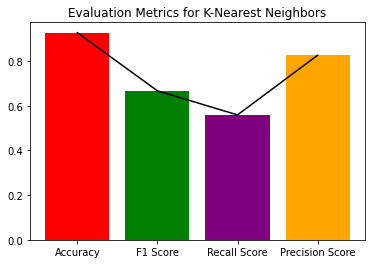

In [78]:
#Visualising evaluation metrics for KNN

accuracy_knn = accuracy_score(Y_test,Y_predict_knn)
precision_knn = precision_score(Y_test, Y_predict_knn)
f1_knn = f1_score(Y_test,Y_predict_knn)
recall_knn = recall_score(Y_test, Y_predict_knn)
print(precision_knn)
print(accuracy_knn)
print(f1_knn)
print(recall_knn)

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy_knn,f1_knn,recall_knn,precision_knn],color=['red','green','purple','orange'])
plt.plot([accuracy_knn,f1_knn,recall_knn,precision_knn],color='black')
plt.title('Evaluation Metrics for K-Nearest Neighbors')

# Visualising NN vs KNN

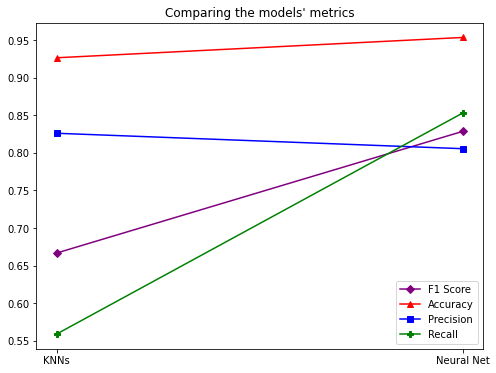

In [100]:
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','Boosted Random Forest'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['purple','red'])
plt.plot(['KNNs','Neural Net'],[f1_knn,f1_nn],color='purple',marker='D')
plt.plot(['KNNs','Neural Net'],[accuracy_knn,accuracy_nn],color='red',marker='^')
plt.plot(['KNNs','Neural Net'],[precision_knn,precision_nn],color='blue',marker='s')
plt.plot(['KNNs','Neural Net'],[recall_knn,recall_nn],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparing the models\' metrics')

plt.show(fig)